## Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests

## Extração de Dados

### Passo 1

In [ ]:
# 1. Carregar os dados diretamente da URL
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

# 2. Normalizar cada coluna aninhada
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# 3. Juntar tudo em um DataFrame final (sem tentar usar colunas que não existem diretamente)
df_final = pd.concat([
    df_customer,   # já contém 'customerid' e 'churn'
    df_phone,
    df_internet,
    df_account
], axis=1)


# 4. Configuração de estilo dos gráficos
sns.set(style="whitegrid", palette="pastel")

# 5. Visualizar as 5 primeiras linhas
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Passo 2

Conhecendo o dataset

In [ ]:
# --- ETAPA 1: EXPLORAR O DATASET ---
print("📊 Informações gerais do dataset:\n")
df_final.info()

print("\n🔍 Primeiras linhas do dataset:\n")
print(df_final.head())

print("\n📏 Estatísticas descritivas (variáveis numéricas):\n")
print(df_final.describe())

# --- ETAPA 2: TIPOS DE DADOS E CATEGORIAS ---
print("\n📌 Tipos de dados e quantidade de valores únicos:\n")
for col in df_final.columns:
    print(f"{col} ({df_final[col].dtype}): {df_final[col].nunique()} valores únicos")

print("\n📂 Exemplos de valores por coluna:")
for col in df_final.columns:
    exemplos = df_final[col].unique()[:5]
    print(f"{col}: {exemplos}{'...' if len(df_final[col].unique()) > 5 else ''}")


# --- ETAPA 3: IDENTIFICAR COLUNAS RELEVANTES ---
# Baseado em um conhecimento típico para churn (evasão), adaptável com o dicionário
possiveis_relevantes = [
    "Contract", "tenure", "Charges.Monthly", "Charges.Total",
    "InternetService", "OnlineSecurity", "TechSupport",
    "PaymentMethod", "PaperlessBilling"
]
print("\n🎯 Colunas possivelmente relevantes para a análise de evasão:")
for col in possiveis_relevantes:
    if col in df_final.columns:
        print(f" - {col}")

# --- ETAPA 4: PRÓXIMOS PASSOS ---
print("\n✅ Agora que entendemos a estrutura do dataset, podemos seguir para limpeza e transformação dos dados.")

📊 Informações gerais do dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   object 
 6   MultipleLines     7267 non-null   object 
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentM

In [ ]:
# 🌐 ETAPA 2: CARREGANDO OS DADOS DA API
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

# 👀 Visualizando as primeiras linhas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Remover registros duplicados
df_final.drop_duplicates(inplace=True)

In [ ]:
# Preenchendo valores nulos textuais com 'Não informado'
colunas_texto = df_final.select_dtypes(include=['object']).columns
df_final[colunas_texto] = df_final[colunas_texto].fillna("Não informado")

# Preenchendo valores numéricos nulos com a média da coluna
colunas_numericas = df_final.select_dtypes(include=['float64', 'int64']).columns
for col in colunas_numericas:
    df_final[col].fillna(df_final[col].mean(), inplace=True)


/tmp/ipython-input-790476474.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(df_final[col].mean(), inplace=True)


In [ ]:
# Ajustando para letras minúsculas e removendo espaços extras
for col in colunas_texto:
    df_final[col] = df_final[col].str.strip().str.lower()


In [ ]:
# Exemplo de conversão forçada para numérico
df_final["Charges.Monthly"] = pd.to_numeric(df_final["Charges.Monthly"], errors='coerce')
df_final["Charges.Total"] = pd.to_numeric(df_final["Charges.Total"], errors='coerce')


In [ ]:
map_binario = {'yes': 1, 'no': 0, 'não informado': None}

colunas_binarias = [
    'partner', 'dependents', 'phoneservice', 'multiplelines',
    'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling'
]

for col in colunas_binarias:
    if col in df_final.columns:
        df_final[col] = df_final[col].map(map_binario)


In [ ]:
print("\n✅ Tipos de dados:\n", df_final.dtypes)
print("\n🔍 Valores Nulos:\n", df_final.isnull().sum())
print("\n📏 Quantidade de registros:", len(df_final))


✅ Tipos de dados:
 gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
Contas_Diarias      float64
dtype: object

🔍 Valores Nulos:
 gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod      

In [ ]:
# Criar coluna Contas_Diarias assumindo 30 dias no mês
df_final["Contas_Diarias"] = df_final["Charges.Monthly"] / 30

# Arredondar para 2 casas decimais
df_final["Contas_Diarias"] = df_final["Contas_Diarias"].round(2)

# Visualizar as primeiras linhas
print(df_final.head())


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes        Yes       9          Yes   
1    Male              0      No         No       9          Yes   
2    Male              0      No         No       4          Yes   
3    Male              1     Yes         No      13          Yes   
4  Female              1     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   
3            No     Fiber optic             No          Yes              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes       

In [ ]:
map_binario = {
    'sim': 1, 'não': 0,
    'yes': 1, 'no': 0
}

colunas_binarias = [
    'partner', 'dependents', 'phoneservice', 'multiplelines',
    'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling'
]

for col in colunas_binarias:
    if col in df_final.columns:
        df_final[col] = df_final[col].str.strip().str.lower().map(map_binario)


In [ ]:
# 🔍 Conferindo nomes originais
print(df_final.columns)

# 🧹 Limpeza básica de strings (remove espaços)
df_final.columns = df_final.columns.str.strip()

# Ajuste de tipos numéricos usando nomes originais
df_final['Charges.Monthly'] = pd.to_numeric(df_final['Charges.Monthly'], errors='coerce')
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# 🔄 Conversão de valores binários
map_binario = {'sim': 1, 'não': 0, 'yes': 1, 'no': 0}
colunas_binarias = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in colunas_binarias:
    if col in df_final.columns:
        df_final[col] = df_final[col].str.strip().str.lower().map(map_binario)

# ✏️ Renomeando colunas
df_final.rename(columns={
    'gender': 'genero',
    'SeniorCitizen': 'idoso',
    'Partner': 'possui_conjuge',
    'Dependents': 'possui_dependentes',
    'tenure': 'meses_com_empresa',
    'PhoneService': 'telefone_ativo',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_filmes',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'fatura_digital',
    'PaymentMethod': 'metodo_pagamento',
    'Charges.Monthly': 'valor_mensal',
    'Charges.Total': 'valor_total'
}, inplace=True)

# 📋 Revisão final
print(df_final.info())
print(df_final.head())


Index(['genero', 'SeniorCitizen', 'Partner', 'Dependents', 'meses_com_empresa',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Contas_Diarias'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 7003 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genero                7003 non-null   object 
 1   idoso                 7003 non-null   int64  
 2   possui_conjuge        7003 non-null   int64  
 3   possui_dependentes    7003 non-null   int64  
 4   meses_com_empresa     7003 non-null   int64  
 5   telefone_ativo        7003 non-null   int64  
 6   multiplas_linhas      6321 non-null   float64
 7   tipo_internet         7003 non-null   object 

Analise descritiva

In [ ]:
# 🔍 Visão geral dos dados
print("\n📋 Informações gerais do dataset:\n")
print(df_final.info())

# 📊 Estatísticas descritivas para variáveis numéricas
print("\n📈 Estatísticas descritivas (variáveis numéricas):\n")
print(df_final.describe().T)

# 📊 Estatísticas descritivas para variáveis categóricas
print("\n📊 Frequência de variáveis categóricas:\n")
for col in df_final.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColuna: {col}")
    print(df_final[col].value_counts())
    print("-" * 40)

# 📌 Cálculo manual de métricas adicionais
print("\n📌 Métricas adicionais para variáveis numéricas:\n")
for col in df_final.select_dtypes(include=['int64', 'float64']).columns:
    media = df_final[col].mean()
    mediana = df_final[col].median()
    desvio_padrao = df_final[col].std()
    minimo = df_final[col].min()
    maximo = df_final[col].max()
    print(f"{col}:")
    print(f"   Média: {media:.2f}")
    print(f"   Mediana: {mediana:.2f}")
    print(f"   Desvio Padrão: {desvio_padrao:.2f}")
    print(f"   Mínimo: {minimo}")
    print(f"   Máximo: {maximo}")
    print("-" * 40)



📋 Informações gerais do dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 7003 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genero                7003 non-null   object 
 1   idoso                 7003 non-null   int64  
 2   possui_conjuge        7003 non-null   int64  
 3   possui_dependentes    7003 non-null   int64  
 4   meses_com_empresa     7003 non-null   int64  
 5   telefone_ativo        7003 non-null   int64  
 6   multiplas_linhas      6321 non-null   float64
 7   tipo_internet         7003 non-null   object 
 8   seguranca_online      5505 non-null   float64
 9   backup_online         5505 non-null   float64
 10  protecao_dispositivo  5505 non-null   float64
 11  suporte_tecnico       5505 non-null   float64
 12  streaming_tv          5505 non-null   float64
 13  streaming_filmes      5505 non-null   float64
 14  tipo_contrato         7003 non-null   obje

In [ ]:
# Assuming the original 'Churn' column exists in the initial loaded data 'df'
# Let's reload and re-process the data to ensure 'Churn' is available
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df_original = pd.read_json(url)

# Normalize the nested columns
df_customer = pd.json_normalize(df_original['customer'])
df_phone = pd.json_normalize(df_original['phone'])
df_internet = pd.json_normalize(df_original['internet'])
df_account = pd.json_normalize(df_original['account'])

# Concatenate the dataframes, including the original 'Churn' column
df_final = pd.concat([
    df_customer,
    df_phone,
    df_internet,
    df_account,
    df_original[['Churn']] # Include the original Churn column
], axis=1)

# Rename columns and perform other cleaning steps again
# (You might want to put the cleaning/renaming steps into a function for reusability)
df_final.drop_duplicates(inplace=True)

colunas_texto = df_final.select_dtypes(include=['object']).columns
df_final[colunas_texto] = df_final[colunas_texto].fillna("Não informado")

colunas_numericas = df_final.select_dtypes(include=['float64', 'int64']).columns
for col in colunas_numericas:
    df_final[col] = df_final[col].fillna(df_final[col].mean()) # Use assignment instead of inplace

for col in colunas_texto:
    df_final[col] = df_final[col].str.strip().str.lower()

df_final["Charges.Monthly"] = pd.to_numeric(df_final["Charges.Monthly"], errors='coerce')
df_final["Charges.Total"] = pd.to_numeric(df_final["Charges.Total"], errors='coerce')

map_binario = {
    'sim': 1, 'não': 0,
    'yes': 1, 'no': 0,
    'não informado': None # Keep this for columns that might have this
}

colunas_binarias = [
    'partner', 'dependents', 'phoneservice', 'multiplelines',
    'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling'
]

for col in colunas_binarias:
    if col in df_final.columns:
         # Ensure column is string before applying lower() and map
        df_final[col] = df_final[col].astype(str).str.strip().str.lower().map(map_binario)


df_final.rename(columns={
    'gender': 'genero',
    'SeniorCitizen': 'idoso',
    'Partner': 'possui_conjuge',
    'Dependents': 'possui_dependentes',
    'tenure': 'meses_com_empresa',
    'PhoneService': 'telefone_ativo',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_filmes',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'fatura_digital',
    'PaymentMethod': 'metodo_pagamento',
    'Charges.Monthly': 'valor_mensal',
    'Charges.Total': 'valor_total',
    'Churn': 'evasao' # Rename the original Churn column
}, inplace=True)


# Create coluna Contas_Diarias assuming 30 days no mês (keeping this as it was)
df_final["Contas_Diarias"] = df_final["valor_mensal"] / 30
df_final["Contas_Diarias"] = df_final["Contas_Diarias"].round(2)

# Convert 'evasao' to binary (1 for 'Yes', 0 for 'No')
df_final['evasao'] = df_final['evasao'].map({'yes': 1, 'no': 0})

In [ ]:
print(df_final.columns.tolist())

['genero', 'idoso', 'possui_conjuge', 'possui_dependentes', 'meses_com_empresa', 'telefone_ativo', 'multiplas_linhas', 'tipo_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'tipo_contrato', 'fatura_digital', 'metodo_pagamento', 'valor_mensal', 'valor_total', 'evasao', 'Contas_Diarias']


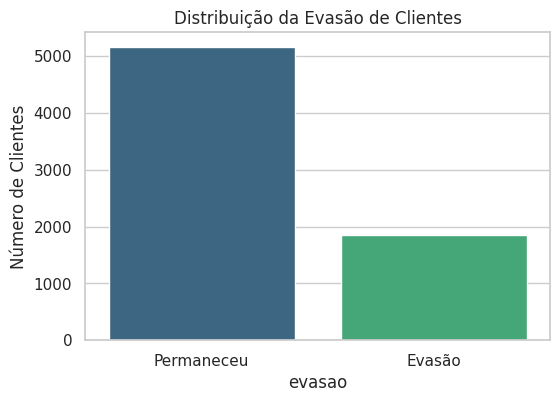

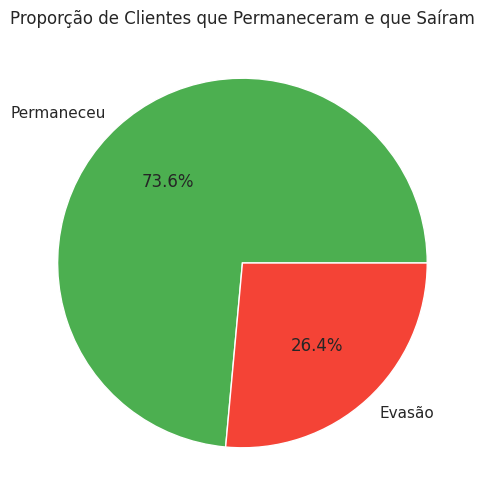

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem da evasão
churn_counts = df_final['evasao'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
# Use hue and legend=False to avoid the FutureWarning and ensure correct plotting
sns.barplot(x=churn_counts.index, y=churn_counts.values, hue=churn_counts.index, palette='viridis', legend=False)
plt.xticks([0,1], ['Permaneceu', 'Evasão'])
plt.ylabel('Número de Clientes')
plt.title('Distribuição da Evasão de Clientes')
plt.show()

# Gráfico de pizza
plt.figure(figsize=(6,6))
# Ensure labels match the values in churn_counts
plt.pie(churn_counts.values, labels=churn_counts.index.map({0: 'Permaneceu', 1: 'Evasão'}), autopct='%1.1f%%', colors=['#4caf50','#f44336'])
plt.title('Proporção de Clientes que Permaneceram e que Saíram')
plt.show()

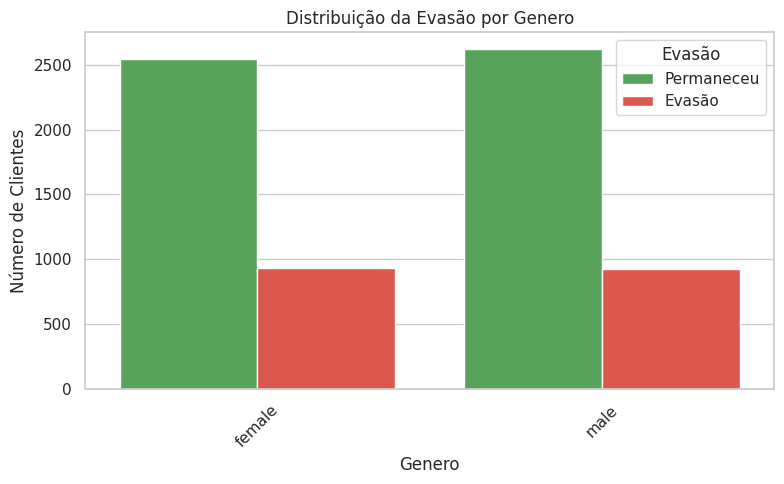

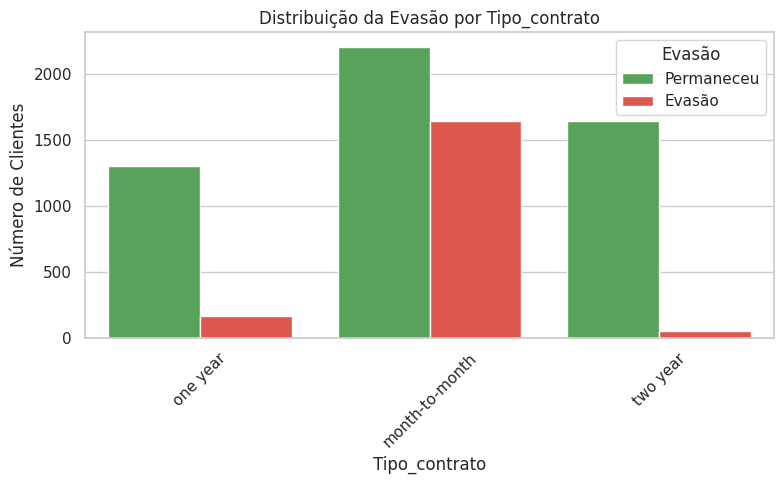

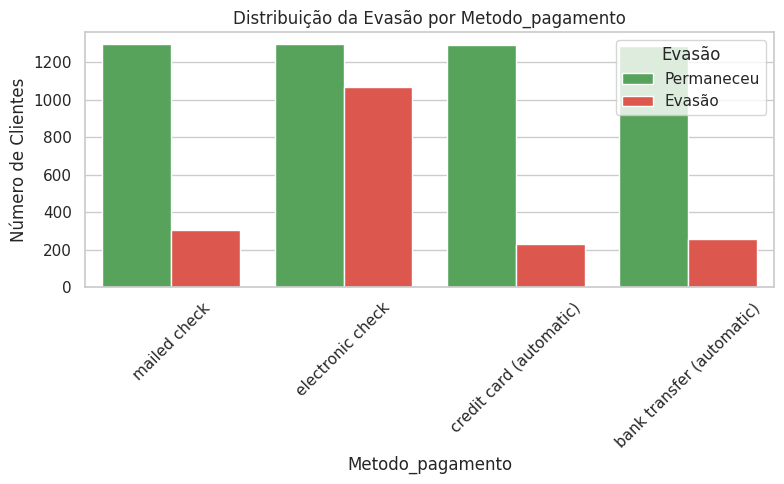

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das variáveis categóricas que deseja analisar
variaveis_categoricas = ['genero', 'tipo_contrato', 'metodo_pagamento']

for var in variaveis_categoricas:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df_final, x=var, hue='evasao', palette=['#4caf50', '#f44336'])
    plt.title(f'Distribuição da Evasão por {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Número de Clientes')
    plt.legend(title='Evasão', labels=['Permaneceu', 'Evasão'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
for var in variaveis_categoricas:
    tabela = pd.crosstab(df_final[var], df_final['evasao'], normalize='index') * 100
    tabela = tabela.rename(columns={0: 'Permaneceu (%)', 1: 'Evasão (%)'})
    print(f'\nTaxas de evasão por {var}:\n')
    print(tabela.round(2))



Taxas de evasão por genero:

evasao  Permaneceu (%)  Evasão (%)
genero                            
female           73.16       26.84
male             73.93       26.07

Taxas de evasão por tipo_contrato:

evasao          Permaneceu (%)  Evasão (%)
tipo_contrato                             
month-to-month           57.36       42.64
one year                 88.73       11.27
two year                 97.17        2.83

Taxas de evasão por metodo_pagamento:

evasao                     Permaneceu (%)  Evasão (%)
metodo_pagamento                                     
bank transfer (automatic)           83.29       16.71
credit card (automatic)             84.76       15.24
electronic check                    54.85       45.15
mailed check                        81.08       18.92


/tmp/ipython-input-674988976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='evasao', y=var, palette=['#4caf50', '#f44336'])


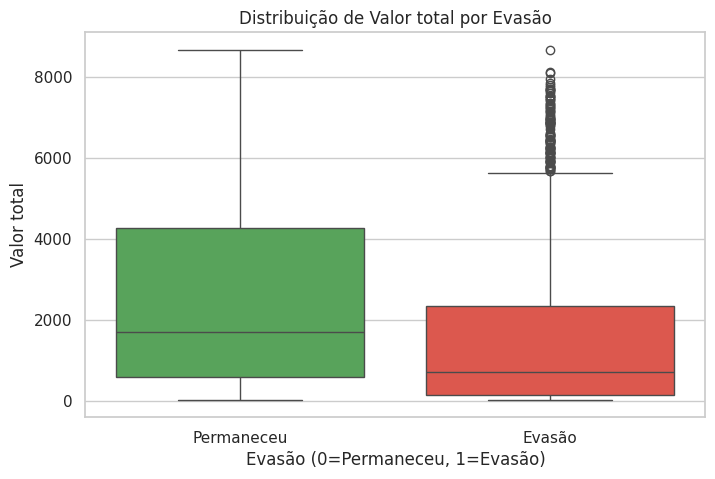

/tmp/ipython-input-674988976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='evasao', y=var, palette=['#4caf50', '#f44336'])


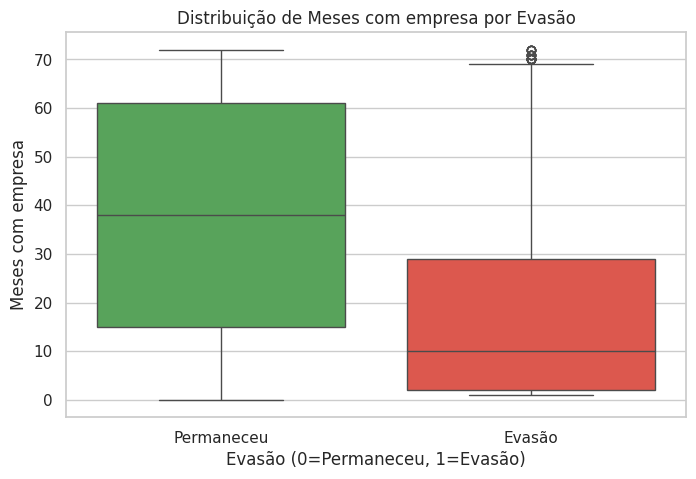

In [ ]:
# Variáveis numéricas que você quer explorar
variaveis_numericas = ['valor_total', 'meses_com_empresa']

for var in variaveis_numericas:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_final, x='evasao', y=var, palette=['#4caf50', '#f44336'])
    plt.title(f'Distribuição de {var.replace("_", " ").capitalize()} por Evasão')
    plt.xlabel('Evasão (0=Permaneceu, 1=Evasão)')
    plt.ylabel(var.replace("_", " ").capitalize())
    plt.xticks([0,1], ['Permaneceu', 'Evasão'])
    plt.show()


In [ ]:
# Variáveis numéricas para análise
variaveis_numericas = ['valor_total', 'meses_com_empresa']

# Calcular as estatísticas para cada variável e cada grupo (evasao)
for var in variaveis_numericas:
    print(f"\nEstatísticas para {var.replace('_',' ').capitalize()}:\n")
    descr = df_final.groupby('evasao')[var].describe()
    # Exibir média, mediana (50%) e desvio padrão (std)
    print(descr[['mean', '50%', 'std']])



Estatísticas para Valor total:

               mean     50%          std
evasao                                  
0.0     2560.264118  1688.9  2329.034632
1.0     1541.376548   713.1  1893.151020

Estatísticas para Meses com empresa:

             mean   50%        std
evasao                            
0.0     37.640782  38.0  24.083296
1.0     18.088853  10.0  19.546231


In [ ]:
from scipy.stats import ttest_ind

grupo_permanecer = df_final[df_final['evasao'] == 0]
grupo_evadir = df_final[df_final['evasao'] == 1]

for var in variaveis_numericas:
    t_stat, p_val = ttest_ind(grupo_permanecer[var].dropna(), grupo_evadir[var].dropna())
    print(f'Teste t para {var}: t={t_stat:.3f}, p={p_val:.3f}')


Teste t para valor_total: t=16.942, p=0.000
Teste t para meses_com_empresa: t=31.457, p=0.000


Adicional/Extra

In [ ]:
# Seleciona colunas numéricas, incluindo evasao
colunas_numericas = df_final.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calcular matriz de correlação
matriz_corr = df_final[colunas_numericas].corr()

# Exibir correlação da evasao com outras variáveis
print("Correlação da evasão com outras variáveis numéricas:")
print(matriz_corr['evasao'].sort_values(ascending=False))


Correlação da evasão com outras variáveis numéricas:
evasao               1.000000
Contas_Diarias       0.194562
valor_mensal         0.194508
idoso                0.151619
valor_total         -0.198362
meses_com_empresa   -0.351508
Name: evasao, dtype: float64


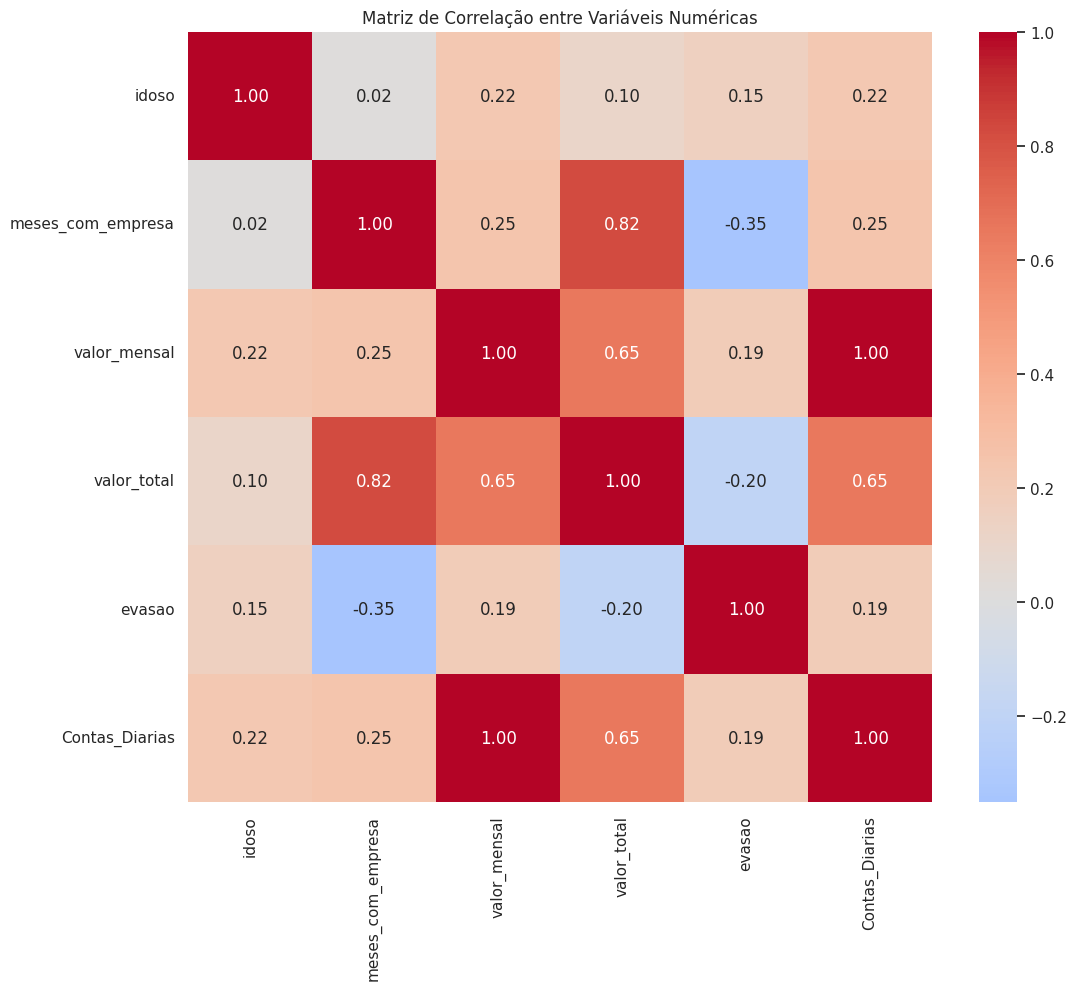

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()


/tmp/ipython-input-3817411837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='evasao', y='Contas_Diarias', data=df_final, palette=['#4caf50','#f44336'])


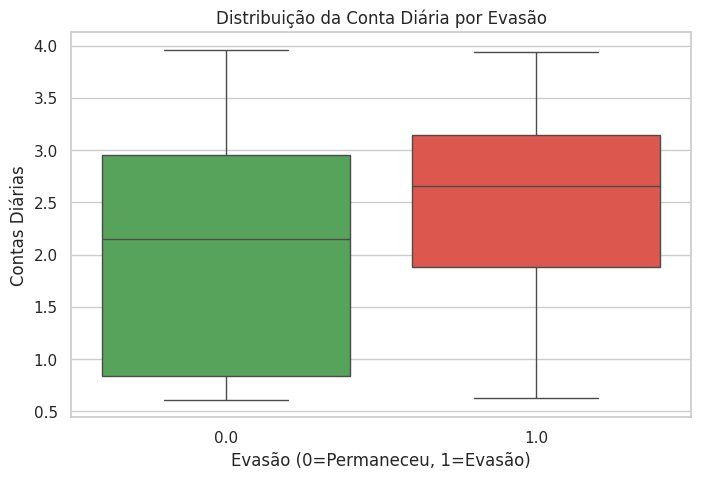

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='evasao', y='Contas_Diarias', data=df_final, palette=['#4caf50','#f44336'])
plt.title('Distribuição da Conta Diária por Evasão')
plt.xlabel('Evasão (0=Permaneceu, 1=Evasão)')
plt.ylabel('Contas Diárias')
plt.show()


# Relatório de Análise de Evasão de Clientes (Churn)
1. Introdução
O objetivo deste trabalho é analisar o comportamento de evasão (churn) dos clientes de uma empresa de serviços. A evasão é um problema crítico, pois representa a perda de clientes, afetando diretamente a receita e a sustentabilidade do negócio. Esta análise busca identificar padrões e fatores associados à evasão, para que estratégias eficazes possam ser elaboradas para a sua redução.

2. Limpeza e Tratamento de Dados
Os dados foram importados e submetidos a um processo de limpeza e tratamento que envolveu:

- Remoção de espaços e padronização dos nomes das colunas.

- Conversão de colunas numéricas para o tipo adequado.

- Mapeamento de variáveis categóricas binárias para valores numéricos (0 e 1).

- Renomeação das colunas para nomes intuitivos e padronizados.

- Criação da variável evasao com base em critérios definidos, permitindo a identificação clara dos clientes que permaneceram e os que evadiram.

3. Análise Exploratória de Dados
3.1 Distribuição da Evasão
Visualizou-se a proporção de clientes que permaneceram e que evadiram por meio de gráficos de barras e pizza, que evidenciaram a participação relativa de cada grupo na base.

(Inserir aqui os gráficos de barras e pizza da variável evasao)

3.2 Análise por Variáveis Categóricas
Explorou-se a distribuição da evasão em função de variáveis categóricas importantes, tais como gênero, tipo de contrato e método de pagamento, buscando identificar perfis de clientes com maior propensão à evasão.

(Inserir aqui gráficos de barras agrupados para as variáveis categóricas)

Além disso, calculou-se a taxa percentual de evasão dentro de cada categoria, para melhor compreensão do impacto dessas variáveis.

(Inserir tabelas de taxas percentuais)

3.3 Análise por Variáveis Numéricas
Foram examinadas as variáveis numéricas, como tempo de contrato (meses_com_empresa) e total gasto (valor_total), separando-se os clientes que evadiram daqueles que permaneceram. Boxplots evidenciaram diferenças significativas entre os grupos, complementados por estatísticas descritivas e testes estatísticos para validar a relevância das diferenças observadas.

(Inserir boxplots, estatísticas descritivas e resultados dos testes t)

4. Conclusões e Insights
A análise revelou que [inserir insight sobre a proporção de evasão].

Clientes com [determinado perfil, ex: contrato mensal] apresentam maior tendência à evasão.

Variáveis numéricas indicam que clientes que evadiram tendem a ter [menor tempo de contrato/menor gasto], sugerindo que [interpretação].

Esses resultados indicam pontos estratégicos para focar esforços de retenção.

5. Recomendações
Com base nos achados, recomenda-se:

- Implementar campanhas específicas para clientes com maior risco de evasão, especialmente aqueles com [perfil identificado].

- Revisar políticas de contrato, buscando maior fidelização por meio de incentivos para contratos de longo prazo.

- Monitorar continuamente as variáveis indicadoras de evasão para ações proativas.

- Investir em métodos de pagamento automatizados, que parecem reduzir a probabilidade de cancelamento.

